# Exploring Baby Names in the United States

You can download this data from the Social Security Adminstration [here](https://www.ssa.gov/OACT/babynames/limits.html).  There are additional data files by state and territory that could be combined or analyzed on their own.  We begin by exploring the results of downloading and unzipping the files using bash commands with the magin command `%%bash`.


In [1]:
%%bash
ls names/*.txt | head -n 10

names/yob1880.txt
names/yob1881.txt
names/yob1882.txt
names/yob1883.txt
names/yob1884.txt
names/yob1885.txt
names/yob1886.txt
names/yob1887.txt
names/yob1888.txt
names/yob1889.txt


In [2]:
%%bash
head -n 10 names/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [3]:
import pandas as pd

In [4]:
names1880 = pd.read_csv('names/yob1880.txt', names = ['name', 'sex', 'births'])

In [5]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [7]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [8]:
%%bash
ls names/ | tail -n 5

yob2013.txt
yob2014.txt
yob2015.txt
yob2016.txt
yob2017.txt


In [7]:
pieces = []
columns = ['name', 'sex', 'births']

In [8]:
years = range(1880, 2018)
pieces = []
for year in years:
    #remember that here, I'm providing a variable to add on to the path
    #as a digit using the value of year.  Then, we pass this value to the read_csv
    #method, and tack the dataframe on to our data each time through the loop
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)

In [9]:
names = pd.concat(pieces, ignore_index = True)

In [10]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [11]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 58.7+ MB


In [12]:
import numpy as np

### `pivot_table`

Just as in Microsoft Excel and Google Sheets, we have a `pivot_table` method in Pands.  This takes values of a given row and creates a dataframe with these values as columns.  For example, we can create a table that pivots the sex column and applies a sum of the birth values.  This in effect gives us the total births per year by gender.

In [13]:
total_births = names.pivot_table(values = 'births', index = 'year', columns = 'sex', aggfunc = np.sum)

In [17]:
total_births['F'].head()

year
1880     90993
1881     91953
1882    107847
1883    112319
1884    129020
Name: F, dtype: int64

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

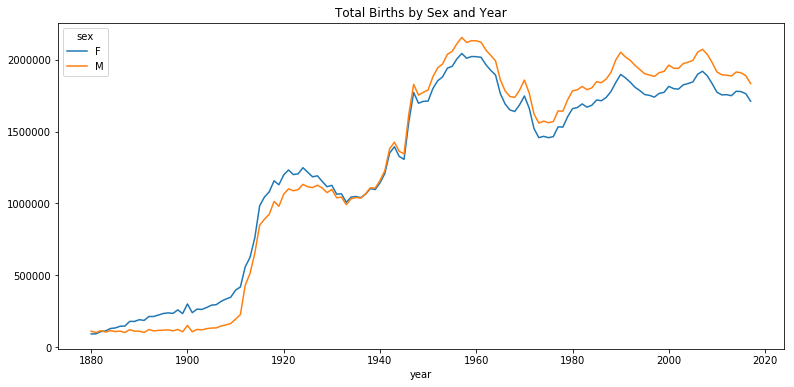

In [16]:
total_births.plot(title = 'Total Births by Sex and Year', figsize = (13, 6))

In [18]:
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]

In [20]:
grouped = names.groupby(['year', 'sex'])

In [21]:
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

In [22]:
top1000.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [25]:
boys = top1000[top1000.sex == 'M']

In [26]:
boys.head()

,name,sex,births,year
942,John,M,9655,1880
943,William,M,9532,1880
944,James,M,5927,1880
945,Charles,M,5348,1880
946,George,M,5126,1880


In [27]:
girls = top1000[top1000.sex == 'F']

In [28]:
girls.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [29]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)

In [30]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1880 to 2017
Columns: 7134 entries, Aaden to Zyaire
dtypes: float64(7134)
memory usage: 7.5 MB


In [31]:
total_births.head()

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN


In [32]:
subset = total_births[['Jacob', 'Erika', 'Valentino', 'Michael', 'Tina', 'Vincent']]

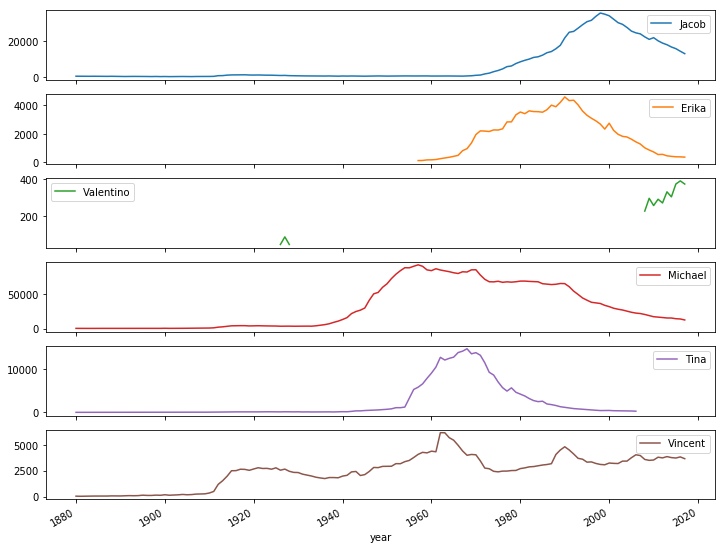

In [33]:
subset.plot(subplots = True, figsize = (12, 10));

### Diversity of Names

We saw that the number of births was fairly steady, however our names seem to be falling out of favor.  This may be because new ones have overtaken them; Valentino has seen a rise in popularity only recently.  Also, it may be that the diversity of names is increasing.  One way to explore this would be to create a diversity column and then explore where high and low diversity of naming is happening.

In [29]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group

In [30]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [31]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [32]:
def get_top(group):
    return group.sort_values(by = 'prop', ascending = False)[:1]

In [33]:
names.columns

Index(['name', 'sex', 'births', 'year', 'prop'], dtype='object')

In [34]:
top_prop = names.groupby(['year', 'sex']).apply(get_top)

In [35]:
type(top_prop)

pandas.core.frame.DataFrame

In [36]:
top_prop.nlargest(10, 'prop')

,,,name,sex,births,year,prop
year,sex,,,,,,
1880,M,942,John,M,9655,1880,0.087383
1881,M,2938,John,M,8769,1881,0.087043
1883,M,7116,John,M,8894,1883,0.085007
1882,M,4963,John,M,9557,1882,0.084065
1884,M,9318,John,M,9388,1884,0.082033
1886,M,14019,John,M,9026,1886,0.081474
1885,M,11640,John,M,8756,1885,0.081225
1887,M,16435,John,M,8110,1887,0.079970
1880,F,0,Mary,F,7065,1880,0.077643


In [37]:
top_prop.nsmallest(10, 'prop')

,,,name,sex,births,year,prop
year,sex,,,,,,
2013,M,1778853,Noah,M,18241,2013,0.009667
2008,F,1588148,Emma,F,18809,2008,0.009959
2014,M,1812072,Noah,M,19286,2014,0.010070
2012,M,1745388,Jacob,M,19069,2012,0.010073
2007,F,1553198,Emily,F,19355,2007,0.010077
2016,M,1878034,Noah,M,19082,2016,0.010101
2017,M,1910505,Liam,M,18728,2017,0.010209
2015,M,1845193,Noah,M,19613,2015,0.010270
2009,M,1643397,Jacob,M,21169,2009,0.010686
